In [17]:
import pandas as pd
from autogluon.tabular import TabularPredictor, TabularDataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# LOADING THE DATA

*Random Seed for Reproducibility*

In [19]:
np.random.seed(99)

*Loading the Datasets*

In [20]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

*Checking the Datasets*

In [21]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [22]:
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


*Dropping the casual and registered columns*

In [23]:
train = df_train.drop(columns=['casual', 'registered'], axis=1)

*Renaming the df_test DataFrame to test*

In [24]:
test = df_test

*Checking the length of the Datasets*

In [25]:
train.shape

(10886, 10)

In [26]:
test.shape

(6493, 9)

# INITIAL MODEL

*Converting DataFrames to TabularDatasets for Autogluon*

In [27]:
train_data = TabularDataset(train)
test_data = TabularDataset(test)

*Training first model (Default Model, No EDA, No Feature Engineering)*

In [28]:
predictor_1 = TabularPredictor(label='count').fit(train_data=train)


No path specified. Models will be saved in: "AutogluonModels\ag-20250321_030125"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       7.64 GB / 15.42 GB (49.5%)
Disk Space Avail:   108.02 GB / 456.29 GB (23.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'        

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	1.03s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-134.0804	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.0136	 = Validation score   (-root_mean_squared_error)
	1.38s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-134.2362	 = Validation score   (-root_mean_squared_error)
	5.08s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.4202	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-136.7771	 = Validation score   (-root_mean_squared_error)
	7.56s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-135.769	 = Validation score   (-root_mean_squared_error)
	1.92s	 = Training   runtime
	0.0s	 = Validation 

*Summary of initial training*

In [29]:
predictor_1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -92.389673  root_mean_squared_error       0.017629   0.039008                0.000000           0.015003            2       True         12
1        KNeighborsDist  -92.389673  root_mean_squared_error       0.017629   0.024005                0.017629           0.024005            1       True          2
2        KNeighborsUnif -109.626075  root_mean_squared_error       0.020980   0.026005                0.020980           0.026005            1       True          1
3       RandomForestMSE -122.013622  root_mean_squared_error       0.053250   1.382365                0.053250           1.382365            1       True          5
4         ExtraTreesMSE -128.420222  root_mean_squared_error       0.048334   0.689008                0.048334   

d:\miniconda3\envs\auto_python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.62607530626073,
  'KNeighborsDist': -92.38967289813668,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -122.01362204763117,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.42022189393495,
  'NeuralNetFastAI': -136.77705987188926,
  'XGBoost': -135.7689524728067,
  'NeuralNetTorch': -138.391912989268,
  'LightGBMLarge': -130.52882934609937,
  'WeightedEnsemble_L2': -92.38967289813668},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNe

# KAGGLE SUBMISSION (1)

*Predicting on test set*

In [30]:
predictor_1_preds = predictor_1.predict(test_data)

<!-- *Submission file creation* -->

In [31]:
submission_1 = pd.DataFrame(
{
	'datetime' : df_test['datetime'],
	'count' : predictor_1_preds
})

In [32]:
# submission_1.to_csv('intial_submission.csv', index=False)

In [33]:
submission_1.shape

(6493, 2)

<!-- # EDA and FEATURE ENGINEERING -->

<!-- *Checking the dtypes of the data* -->

In [34]:
predictor_1.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-92.389673,root_mean_squared_error,0.017629,0.039008,0.000000,0.015003,2,True,12
1,KNeighborsDist,-92.389673,root_mean_squared_error,0.017629,0.024005,0.017629,0.024005,1,True,2
2,KNeighborsUnif,-109.626075,root_mean_squared_error,0.020980,0.026005,0.020980,0.026005,1,True,1
3,RandomForestMSE,-122.013622,root_mean_squared_error,0.053250,1.382365,0.053250,1.382365,1,True,5
4,ExtraTreesMSE,-128.420222,root_mean_squared_error,0.048334,0.689008,0.048334,0.689008,1,True,7
5,LightGBMLarge,-130.528829,root_mean_squared_error,0.007001,1.338341,0.007001,1.338341,1,True,11
6,LightGBM,-134.080427,root_mean_squared_error,0.007945,0.834232,0.007945,0.834232,1,True,4
7,CatBoost,-134.236163,root_mean_squared_error,0.002575,5.084475,0.002575,5.084475,1,True,6
8,XGBoost,-135.768952,root_mean_squared_error,0.004001,1.915143,0.004001,1.915143,1,True,9
9,LightGBMXT,-135.958034,root_mean_squared_error,0.013001,1.028234,0.013001,1.028234,1,True,3


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


<!-- *Missing Value check* -->

In [36]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [37]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<!-- *Unique Value check* -->

In [38]:
train.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
count           822
dtype: int64

In [39]:
test.nunique()

datetime      6493
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           65
humidity        79
windspeed       27
dtype: int64

<!-- *Visualization of Target variable "count" distribution* -->

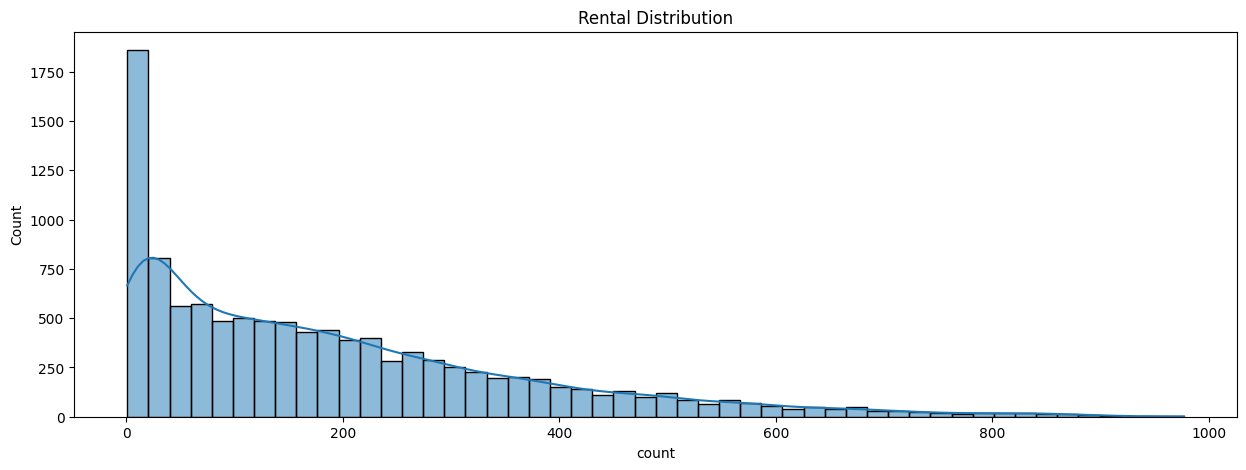

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(train['count'], bins=50, kde=True)
plt.title('Rental Distribution')
plt.show()

<!-- *Data is highly skewed towards 0 log transformation will help* -->

In [41]:
train['log_count'] = np.log1p(train['count'])

<!-- *Distribution after log application to the target variable* -->

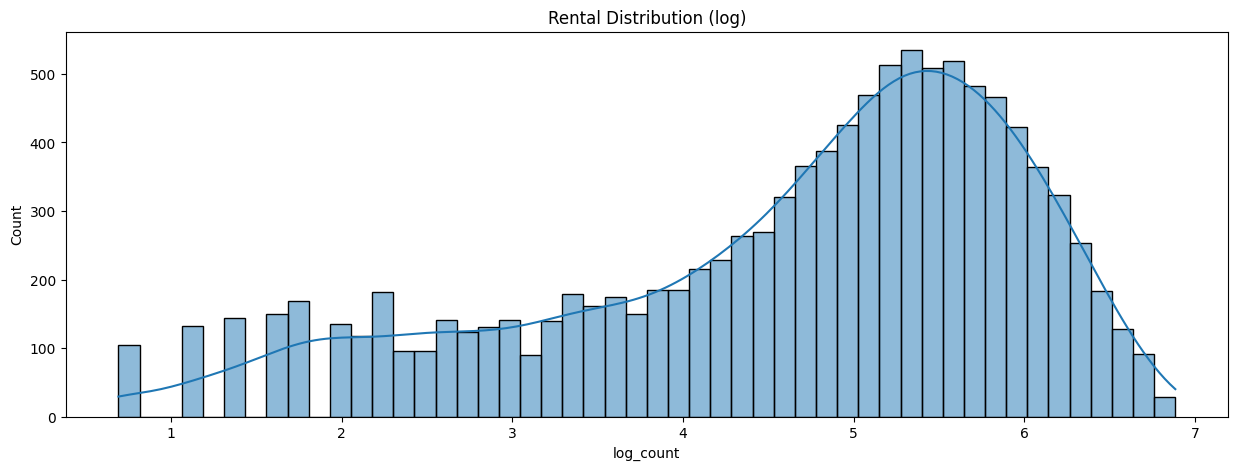

In [42]:
plt.figure(figsize=(15,5))
sns.histplot(train['log_count'], bins=50, kde=True)
plt.title('Rental Distribution (log)')
plt.show()

<!-- *Converting the datetime column to datetime object* -->

In [43]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

<!-- *Extracting additional features from datetime* -->

In [44]:
for i in [train, test]:
	i['hour'] = i['datetime'].dt.hour
	i['day'] = i['datetime'].dt.day
	i['month'] = i['datetime'].dt.month
	i['weekday'] = i['datetime'].dt.weekday
	i['year'] = i['datetime'].dt.year
	i['weekend_bool'] = i['weekday'] >= 5
	i["rushhour_bool"] = ((i['hour'] >= 7) & (i['hour'] <= 9) | ((i['hour'] >= 16) & (i['hour'] <= 19)))

<!-- *Visualization of patterns of renting by month and by year* -->

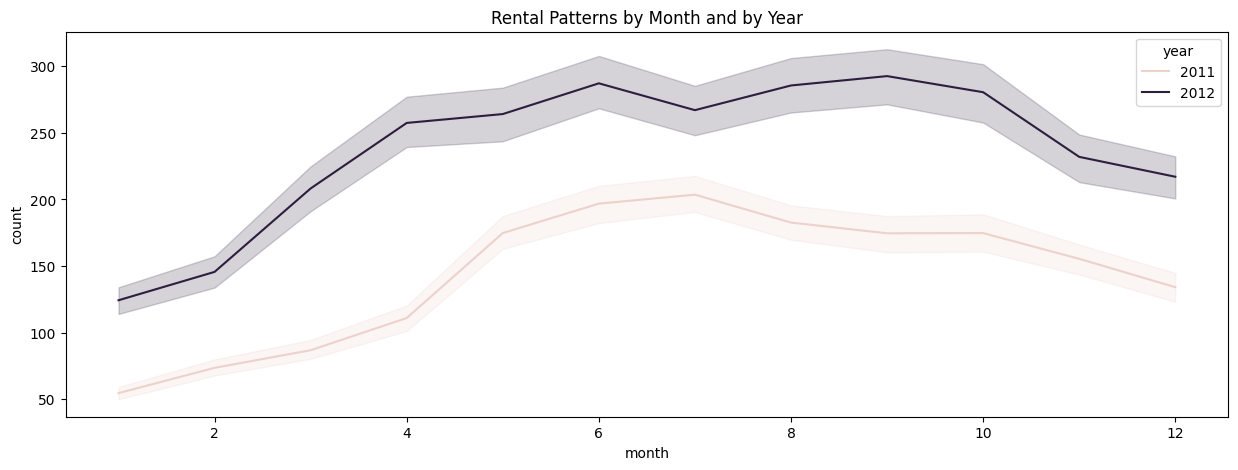

In [45]:
plt.figure(figsize=(15,5))
sns.lineplot(data=train, x='month', y='count', hue='year')
plt.title('Rental Patterns by Month and by Year')
plt.show()

<!-- *Visualization of patterns of renting by hour and by weekday* -->

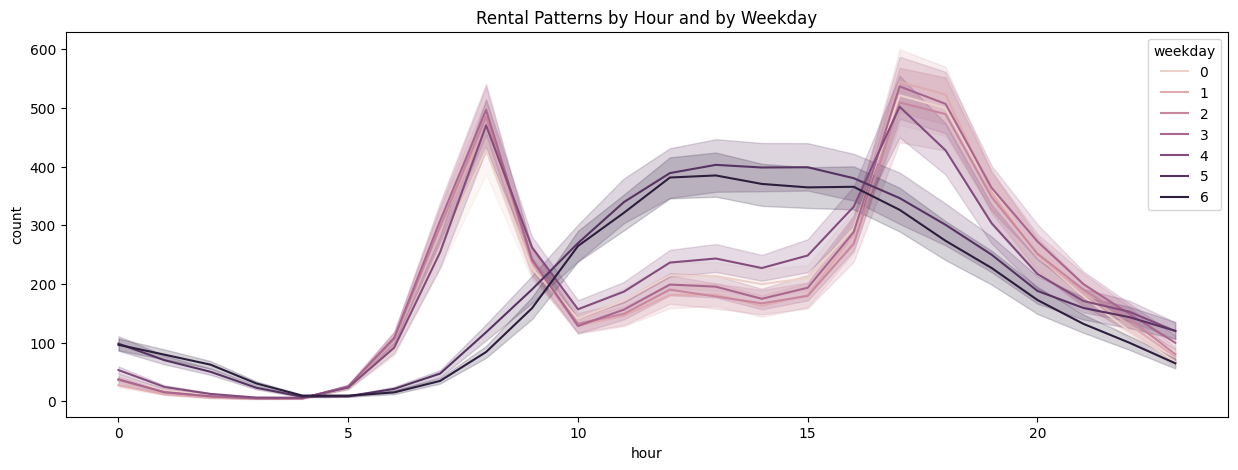

In [46]:
plt.figure(figsize=(15,5))
sns.lineplot(data=train, x='hour', y='count', hue='weekday')
plt.title('Rental Patterns by Hour and by Weekday')
plt.show()

<!-- *Effect of Weather on Bike rentals* -->

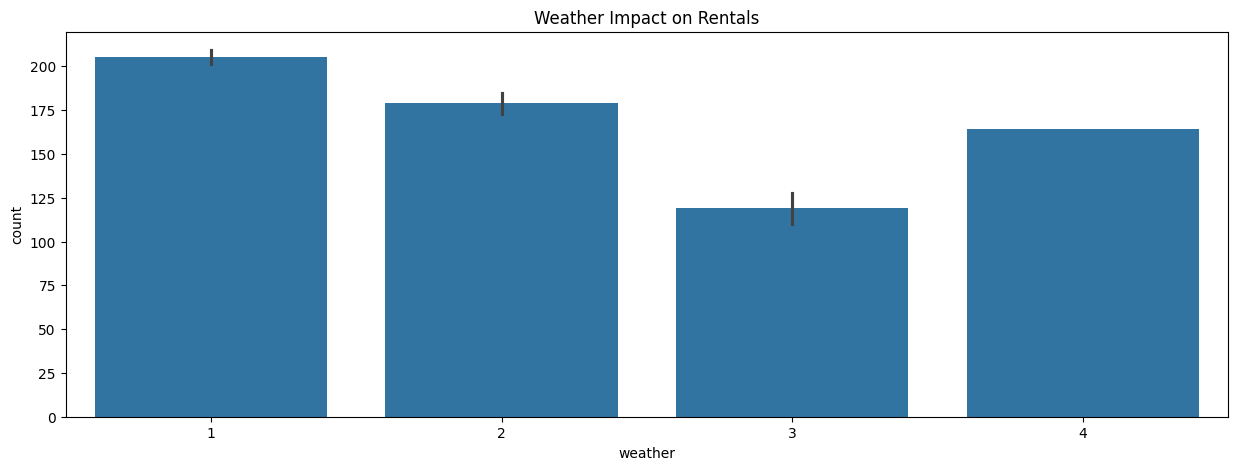

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(data=train, x='weather', y='count')
plt.title('Weather Impact on Rentals')
plt.show()

<!-- *Effect of Temperature on Bike Rentals* -->

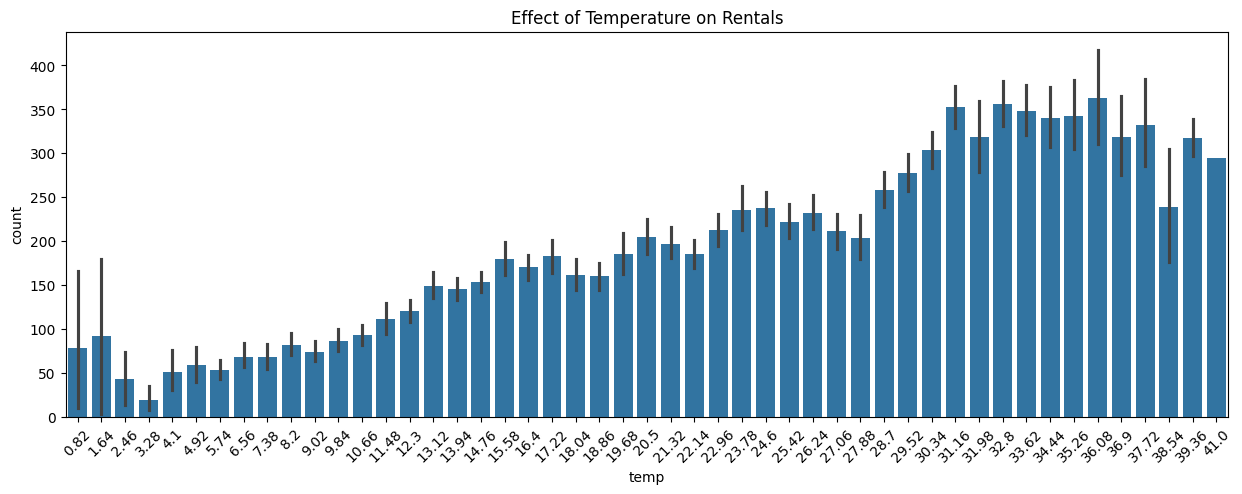

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(data=train, x='temp', y='count')
plt.title('Effect of Temperature on Rentals')
plt.xticks(rotation=45)
plt.show()

<!-- # SECOND MODEL -->

<!-- *Creating new TabularDataset to fit second model* -->

In [49]:
train = train.drop('count', axis=1)

In [50]:
train_2 = TabularDataset(train)
test_2 = TabularDataset(test)

In [51]:
train_2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,log_count,hour,day,month,weekday,year,weekend_bool,rushhour_bool
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,2.833213,0,1,1,5,2011,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,3.713572,1,1,1,5,2011,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,3.496508,2,1,1,5,2011,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,2.639057,3,1,1,5,2011,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.693147,4,1,1,5,2011,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,5.820083,19,19,12,2,2012,False,True
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,5.488938,20,19,12,2,2012,False,False
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,5.129899,21,19,12,2,2012,False,False
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,4.867534,22,19,12,2,2012,False,False


In [52]:
test_2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,weekday,year,weekend_bool,rushhour_bool
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,3,2011,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,3,2011,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,3,2011,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,3,2011,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,3,2011,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19,31,12,0,2012,False,True
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20,31,12,0,2012,False,False
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21,31,12,0,2012,False,False
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22,31,12,0,2012,False,False


<!-- *Training the second model* -->

In [53]:
predictor_2 = TabularPredictor(label='log_count', eval_metric='root_mean_squared_error').fit(train_data=train_2)

No path specified. Models will be saved in: "AutogluonModels\ag-20250321_030249"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       7.50 GB / 15.42 GB (48.6%)
Disk Space Avail:   107.51 GB / 456.29 GB (23.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'        

[1000]	valid_set's rmse: 0.303511
[2000]	valid_set's rmse: 0.299463


	-0.2989	 = Validation score   (-root_mean_squared_error)
	2.31s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.294578
[2000]	valid_set's rmse: 0.29347


	-0.2931	 = Validation score   (-root_mean_squared_error)
	1.75s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3253	 = Validation score   (-root_mean_squared_error)
	1.49s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-0.2836	 = Validation score   (-root_mean_squared_error)
	12.09s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3193	 = Validation score   (-root_mean_squared_error)
	0.78s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.3375	 = Validation score   (-root_mean_squared_error)
	6.78s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2965	 = Validation score   (-root_mean_squared_error)
	0.89s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.3013	 = Validation score   (-root_mean_squared_error)
	139.86s	 = Training   runtime
	0.01s	 = Validation ru

[1000]	valid_set's rmse: 0.294853


	-0.2944	 = Validation score   (-root_mean_squared_error)
	1.97s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.48, 'NeuralNetTorch': 0.28, 'LightGBMLarge': 0.12, 'KNeighborsDist': 0.04, 'LightGBM': 0.04, 'XGBoost': 0.04}
	-0.2761	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 169.74s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 15577.4 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("c:\Users\ASUS ROG\Desktop\Project AWS\AutogluonModels\ag-20250321_030249")


<!-- *Second model Summary* -->

In [54]:
predictor_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.276129  root_mean_squared_error       0.069909  156.601051                0.000000           0.014188            2       True         12
1              CatBoost  -0.283582  root_mean_squared_error       0.004668   12.088862                0.004668          12.088862            1       True          6
2              LightGBM  -0.293066  root_mean_squared_error       0.013003    1.751502                0.013003           1.751502            1       True          4
3         LightGBMLarge  -0.294434  root_mean_squared_error       0.008844    1.970275                0.008844           1.970275            1       True         11
4               XGBoost  -0.296533  root_mean_squared_error       0.006002    0.891940                0.006002   

d:\miniconda3\envs\auto_python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -0.6991793687204798,
  'KNeighborsDist': -0.5590516809281377,
  'LightGBMXT': -0.29894867448223206,
  'LightGBM': -0.29306561092629035,
  'RandomForestMSE': -0.3252699882481743,
  'CatBoost': -0.2835817707031899,
  'ExtraTreesMSE': -0.31932815171539597,
  'NeuralNetFastAI': -0.3374670959858991,
  'XGBoost': -0.2965332270252427,
  'NeuralNetTorch': -0.30128604920843965,
  'LightGBMLarge': -0.29443376443497393,
  'WeightedEnsemble_L2': -0.276128877907523},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUn

In [55]:
predictor_2.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.276129,root_mean_squared_error,0.069909,156.601051,0.000000,0.014188,2,True,12
1,CatBoost,-0.283582,root_mean_squared_error,0.004668,12.088862,0.004668,12.088862,1,True,6
2,LightGBM,-0.293066,root_mean_squared_error,0.013003,1.751502,0.013003,1.751502,1,True,4
3,LightGBMLarge,-0.294434,root_mean_squared_error,0.008844,1.970275,0.008844,1.970275,1,True,11
4,XGBoost,-0.296533,root_mean_squared_error,0.006002,0.891940,0.006002,0.891940,1,True,9
5,LightGBMXT,-0.298949,root_mean_squared_error,0.017004,2.305248,0.017004,2.305248,1,True,3
6,NeuralNetTorch,-0.301286,root_mean_squared_error,0.007002,139.857280,0.007002,139.857280,1,True,10
7,ExtraTreesMSE,-0.319328,root_mean_squared_error,0.049513,0.780363,0.049513,0.780363,1,True,7
8,RandomForestMSE,-0.325270,root_mean_squared_error,0.047994,1.485339,0.047994,1.485339,1,True,5
9,NeuralNetFastAI,-0.337467,root_mean_squared_error,0.012894,6.775449,0.012894,6.775449,1,True,8


<!-- *Predicting on the test set* -->

In [56]:
predictor_2_pred_log = predictor_2.predict(test_2)

<!-- *Reverting the prediction from log to normal* -->

In [57]:
predictor_2_pred = np.expm1(predictor_2_pred_log)

<!-- *Making sure no negative values are present* -->

In [58]:
predictor_2_pred = np.maximum(0, predictor_2_pred)

<!-- *Creating secondary submission file for Kaggle* -->

In [59]:
submission_2 = pd.DataFrame(
	{
		'datetime' : test_2['datetime'],
		'count' : predictor_2_pred
	}
)

In [60]:
# submission_2.to_csv('secondary_submission.csv', index=False)

# TERTIARY TRAINING

# ADDITIONAL FEATURE ENGINEERING

*Converting Features to Categorical Format*

*Creating a list to iterate over*

In [61]:
cat_features = ['weather', 'year', 'month', 'weekday']

In [62]:
for i in cat_features:
	train_2[i] = train[i].astype('category')
	test_2[i] = test[i].astype('category')

*Bool Features are converted to int to be binary*

In [63]:
train_2['rushhour_bool'] = train_2['rushhour_bool'].astype(int)
test_2['rushhour_bool'] = test_2['rushhour_bool'].astype(int)

In [64]:
train_2['weekend_bool'] = train_2['weekend_bool'].astype(int)
test_2['weekend_bool'] = test_2['weekend_bool'].astype(int)

*Adding additional Polynomial Features*

In [65]:
train_2['temp_humidity'] = train_2['temp'] * train_2['humidity']
test_2['temp_humidity'] = test_2['temp'] * test_2['humidity']

train_2['windspeed_temp'] = train_2['temp'] * train_2['windspeed']
test_2['windspeed_temp'] = test_2['temp'] * test_2['windspeed']

train_2['workday_hour'] = train_2['workingday'] * train_2['hour']
test_2['workday_hour'] = test_2['workingday'] * test_2['hour']

*Setting Hyperparameters*

In [66]:
hypers = {
'GBM': {'num_boost_round': 200},
'XGB': {'n_estimators': 500, 'learning_rate': 0.05},
'RF': {'n_estimators': 300},
'NN_TORCH': {'num_epochs': 100},
}

In [67]:
predictor_3 = TabularPredictor(label='log_count', eval_metric='root_mean_squared_error').fit(train_data=train_2, presets='best_quality',time_limit=1200, hyperparameters=hypers)

No path specified. Models will be saved in: "AutogluonModels\ag-20250321_030540"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       7.55 GB / 15.42 GB (49.0%)
Disk Space Avail:   107.00 GB / 456.29 GB (23.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout

In [68]:
predictor_3.fit_summary()

d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3  -0.262010  root_mean_squared_error       1.635863  126.082253                0.001000           0.017381            3       True         10
1    WeightedEnsemble_L2  -0.263148  root_mean_squared_error       0.910787   75.933949                0.000000           0.016004            2       True          5
2        LightGBM_BAG_L2  -0.265539  root_mean_squared_error       0.961977   76.980386                0.051189           1.062441            2       True          6
3         XGBoost_BAG_L2  -0.266493  root_mean_squared_error       1.005806   78.870068                0.095019           2.952123            2       True          8
4         XGBoost_BAG_L1  -0.268815  root_mean_squared_error       0.249637    3.028534                0.249

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -0.27675441267118295,
  'RandomForest_BAG_L1': -0.2895414064256361,
  'XGBoost_BAG_L1': -0.2688150715966854,
  'NeuralNetTorch_BAG_L1': -0.31366575100271726,
  'WeightedEnsemble_L2': -0.2631478545072215,
  'LightGBM_BAG_L2': -0.26553935155795333,
  'RandomForest_BAG_L2': -0.269708624617611,
  'XGBoost_BAG_L2': -0.266492603661895,
  'NeuralNetTorch_BAG_L2': -0.2704694100592912,
  'Weighte

In [69]:
predictor_3.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-0.262010,root_mean_squared_error,1.635863,126.082253,0.001000,0.017381,3,True,10
1,WeightedEnsemble_L2,-0.263148,root_mean_squared_error,0.910787,75.933949,0.000000,0.016004,2,True,5
2,LightGBM_BAG_L2,-0.265539,root_mean_squared_error,0.961977,76.980386,0.051189,1.062441,2,True,6
3,XGBoost_BAG_L2,-0.266493,root_mean_squared_error,1.005806,78.870068,0.095019,2.952123,2,True,8
4,XGBoost_BAG_L1,-0.268815,root_mean_squared_error,0.249637,3.028534,0.249637,3.028534,1,True,3
5,RandomForest_BAG_L2,-0.269709,root_mean_squared_error,1.351886,80.116102,0.441099,4.198158,2,True,7
6,NeuralNetTorch_BAG_L2,-0.270469,root_mean_squared_error,1.047555,117.852149,0.136768,41.934204,2,True,9
7,LightGBM_BAG_L1,-0.276754,root_mean_squared_error,0.106421,0.980545,0.106421,0.980545,1,True,1
8,RandomForest_BAG_L1,-0.289541,root_mean_squared_error,0.404692,2.674156,0.404692,2.674156,1,True,2
9,NeuralNetTorch_BAG_L1,-0.313666,root_mean_squared_error,0.150037,69.234709,0.150037,69.234709,1,True,4


In [70]:
predictor_3_pred_log = predictor_3.predict(test_2)

In [71]:
predictor_3_pred = np.expm1(predictor_3_pred_log)

In [72]:
predictor_3_pred = np.maximum(0, predictor_3_pred)

In [73]:
submission_3 = pd.DataFrame(
	{
		'datetime' : test_2['datetime'],
		'count' : predictor_3_pred
	}
)

In [74]:
# submission_3.to_csv('tertiary_submission.csv', index=False)

# DATA VISUALIZATION

*Extracting Scores*

In [75]:
predictor_1_sum = predictor_1.fit_summary()
predictor_2_sum = predictor_2.fit_summary()
predictor_3_sum = predictor_3.fit_summary()

d:\miniconda3\envs\auto_python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -92.389673  root_mean_squared_error       0.017629   0.039008                0.000000           0.015003            2       True         12
1        KNeighborsDist  -92.389673  root_mean_squared_error       0.017629   0.024005                0.017629           0.024005            1       True          2
2        KNeighborsUnif -109.626075  root_mean_squared_error       0.020980   0.026005                0.020980           0.026005            1       True          1
3       RandomForestMSE -122.013622  root_mean_squared_error       0.053250   1.382365                0.053250           1.382365            1       True          5
4         ExtraTreesMSE -128.420222  root_mean_squared_error       0.048334   0.689008                0.048334   

d:\miniconda3\envs\auto_python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')
d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\co

In [76]:
scores_non_log = [
	predictor_1.leaderboard(silent=True)['score_val'].min(),
	predictor_2.leaderboard(silent=True)['score_val'].min(),
	predictor_3.leaderboard(silent=True)['score_val'].min()
]

In [77]:
scores_non_log

[-138.391912989268, -0.6991793687204798, -0.31366575100271726]

In [78]:
model_hist = ['Initial Model', 'Secondary Model', 'Tertiary Model']

*Reverting Log Transformation*

In [79]:
scores = [np.expm1(i) for i in scores_non_log]

In [80]:
scores

[-1.0, -0.5030070155204658, -0.26923675577570316]

*PLotting the Data*

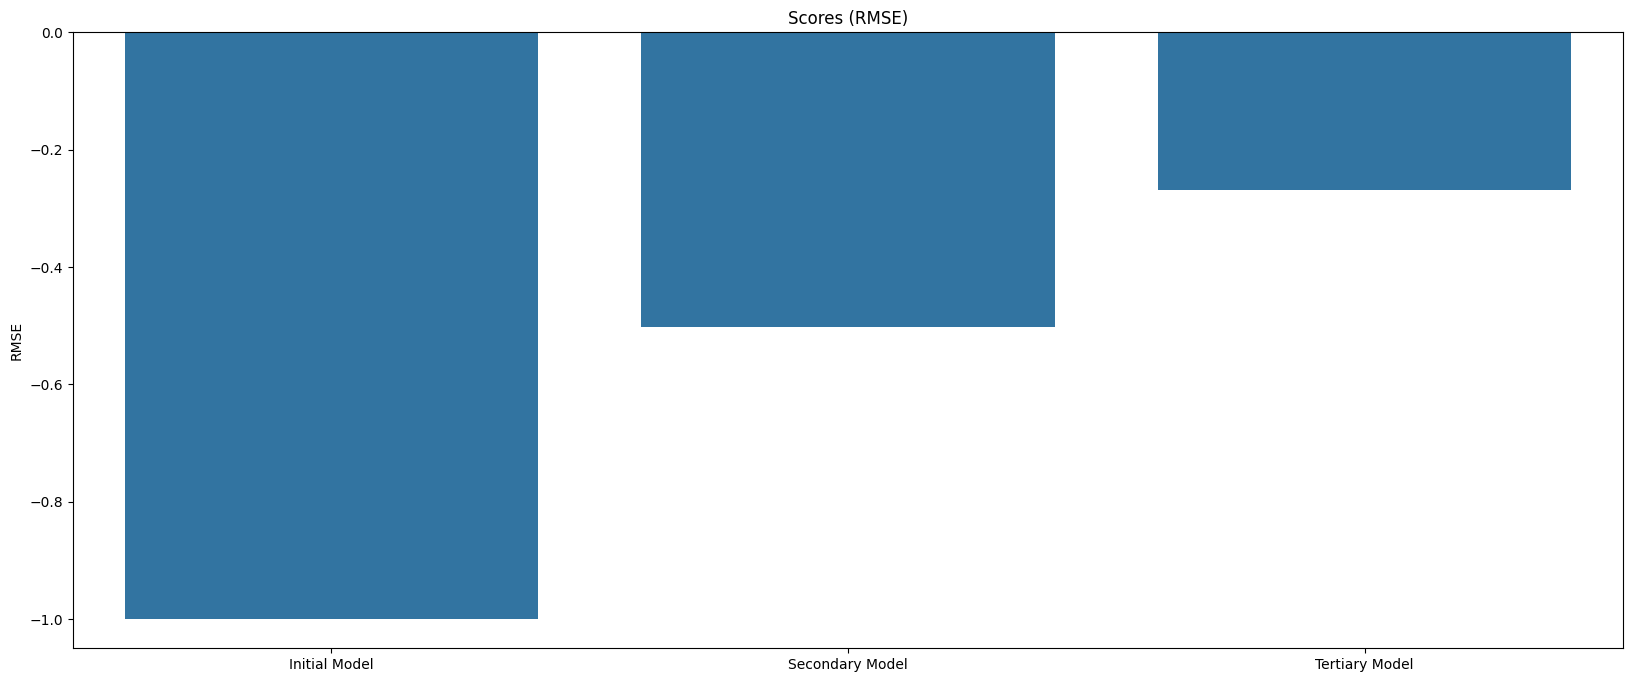

In [81]:
plt.figure(figsize=(20,8))
sns.barplot(x=model_hist, y=scores)
plt.title('Scores (RMSE)')
plt.ylabel('RMSE')
plt.show()

*Kaggle Scores*

In [82]:
kaggle = [1.86413, 0.42063, 0.42091]

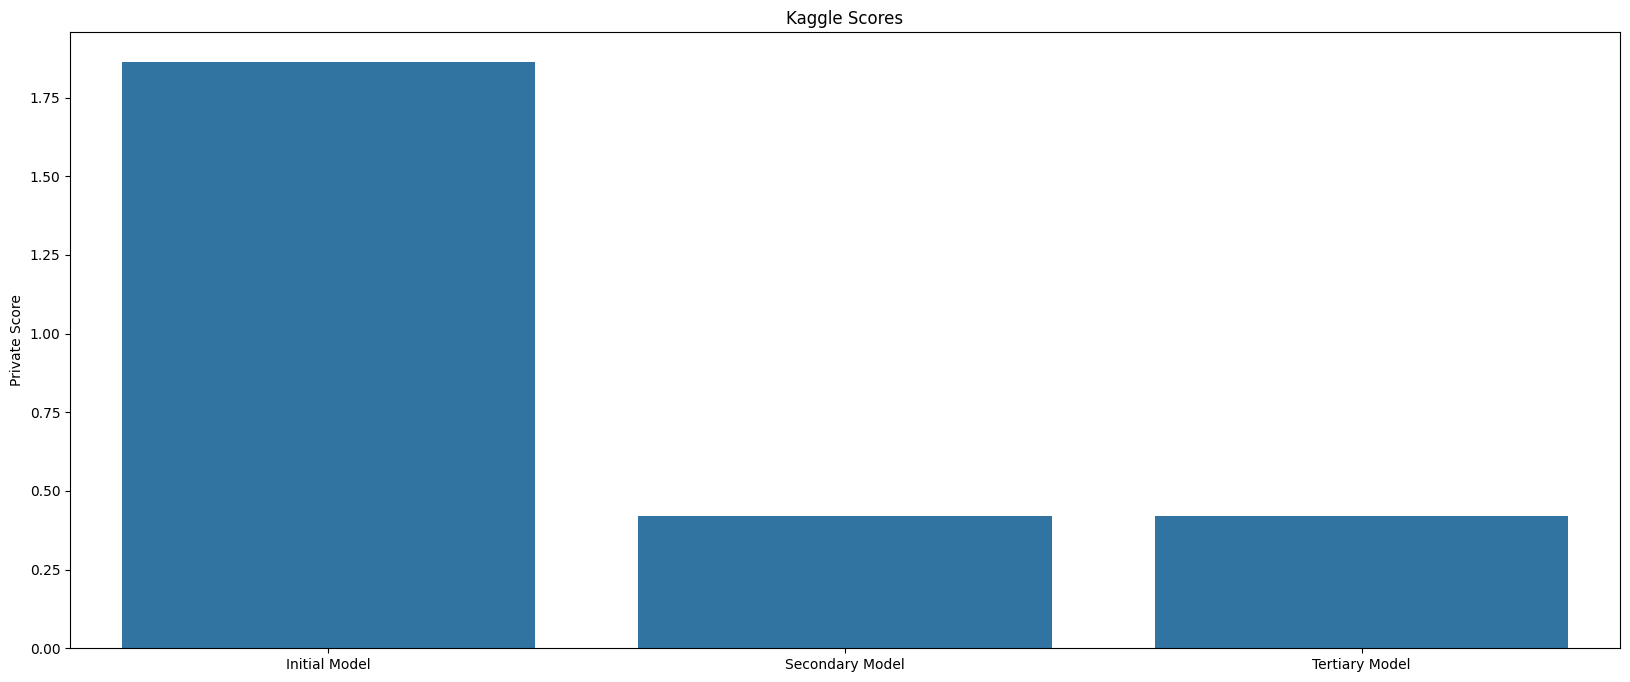

In [83]:
plt.figure(figsize=(20,8))
sns.barplot(x=model_hist, y=kaggle)
plt.title('Kaggle Scores')
plt.ylabel('Private Score')
plt.show()

In [84]:
report_df = pd.DataFrame({
	"Model Stage" : model_hist,
	"Score (RMSE)" : scores,
	"Score (Kaggle)" : kaggle,
	"Changes" : ['Default', 'Feature Engineered \ Cleaned', 'Tuned, Additional Features']
})

In [85]:
display(report_df)

,Model Stage,Score (RMSE),Score (Kaggle),Changes
0,Initial Model,-1.000000,1.86413,Default
1,Secondary Model,-0.503007,0.42063,Feature Engineered \ Cleaned
2,Tertiary Model,-0.269237,0.42091,"Tuned, Additional Features"


In [86]:
md_report = report_df.to_markdown(index=False)

In [87]:
print(md_report)

| Model Stage     |   Score (RMSE) |   Score (Kaggle) | Changes                      |
|:----------------|---------------:|-----------------:|:-----------------------------|
| Initial Model   |      -1        |          1.86413 | Default                      |
| Secondary Model |      -0.503007 |          0.42063 | Feature Engineered \ Cleaned |
| Tertiary Model  |      -0.269237 |          0.42091 | Tuned, Additional Features   |


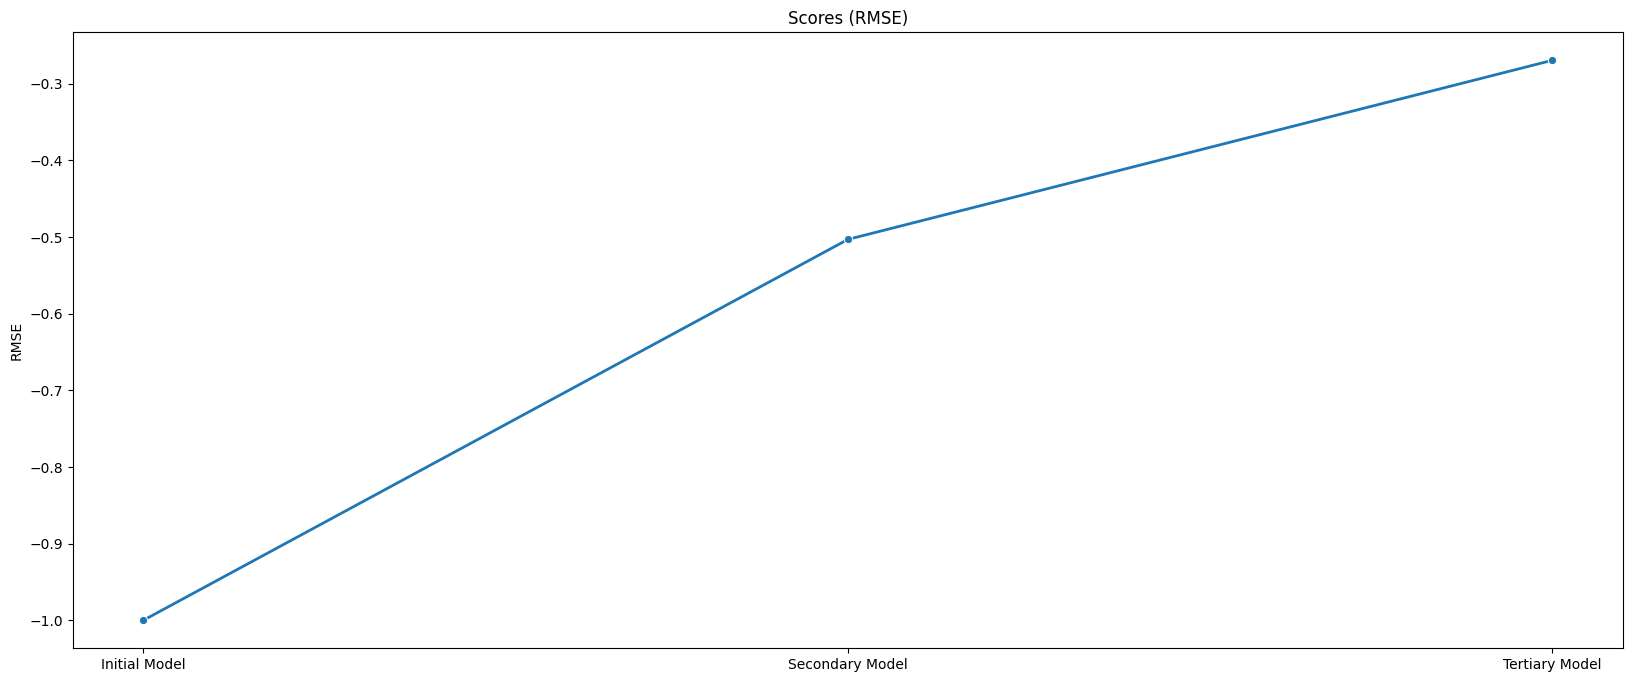

In [91]:
plt.figure(figsize=(20,8))
sns.lineplot(x=model_hist, y=scores, marker="o", linewidth=2)
plt.title('Scores (RMSE)')
plt.ylabel('RMSE')
plt.show()

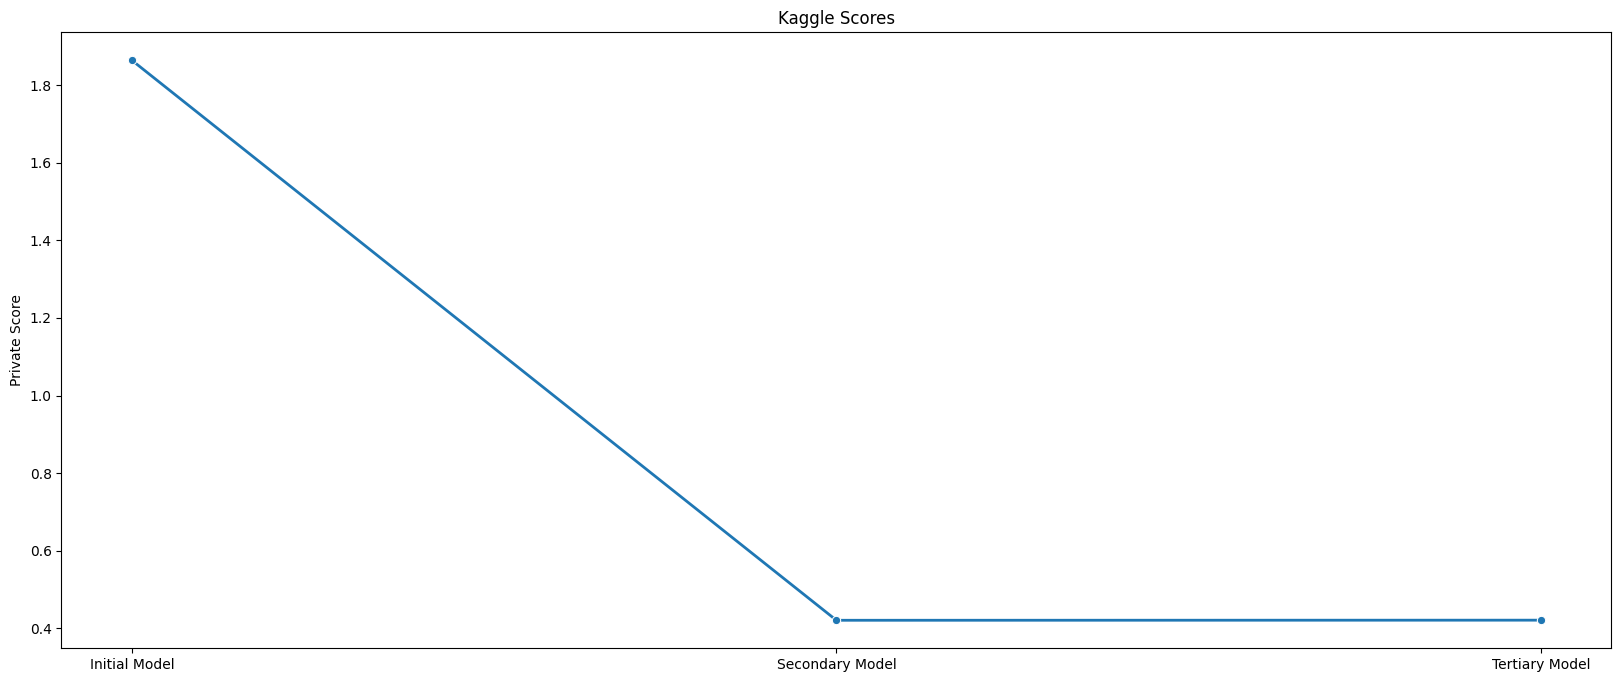

In [92]:
plt.figure(figsize=(20,8))
sns.lineplot(x=model_hist, y=kaggle, marker="o", linewidth=2)
plt.title('Kaggle Scores')
plt.ylabel('Private Score')
plt.show()